In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading QoS analysis raw info
Temporarily, this info is saved in a CSV file but it will be in the database

**qos_analysis_13112018.csv**
- columns = ['url','protocol','code','start','end','duration','runid']
- First try of qos analysis.
- It was obtained from 50 repetitions of each of 3921 eepsites gathered. 
- Just one i2router (UCA desktop host)
- Time gap between each eepsite request 3921*0.3sec=1176sec/60sec ~ 19 mins
- Total experiment elapsed time 50rep X 19 mins ~ 16 hours

**qos_analysis_29112018_local.csv**

- columns = ['url','code','duration','runid']
- 100 repetions of the first 10 eepsite from the list. Just for testing.
- local i2prouter from my laptop
- Time gap between each eepsite 10*5sec=50sec ~ 60s
- Total experiment elapsed time 100rep x 1min ~ 100 mins



In [3]:
# File for processing it
qos_file = 'qos_analysis_13112018.csv'
path_to_file = 'data/' + qos_file

columns = ['url','protocol','code','start','end','duration','runid']
df_qos = pd.read_csv(path_to_file,names=columns,delimiter="|")

# File for processing it - local router
qos_file = 'qos_analysis_29112018_local.csv'
path_to_file = 'data/' + qos_file
columns = ['url','code','duration','runid']
df_qos_local = pd.read_csv(path_to_file,names=columns,delimiter="|")

# File for processing it - local router
qos_file = 'qos_analysis_29112018_remote.csv'
path_to_file = 'data/' + qos_file
columns = ['url','code','duration','runid']
df_qos_remote = pd.read_csv(path_to_file,names=columns,delimiter="|")

# File for testing - to be removed
qos_file = 'analitica.csv'
path_to_file = 'data/' + qos_file
columns = ['url','code','duration','runid','intervals']
df_qos_testing = pd.read_csv(path_to_file,names=columns,delimiter="|")

In [13]:
# DF to analize
df_qos = df_qos_testing.copy()

# Removing not valid rounds
df_qos['runid'] = pd.to_numeric(df_qos['runid'], errors='coerce').dropna()


In [14]:
df_qos.head()

,url,code,duration,runid,intervals
0,http://tracker.crypthost.i2p,200,2.112268,0,0
1,http://tracker.crypthost.i2p,200,2.225629,0,2
2,http://tracker.crypthost.i2p,200,2.375686,0,1
3,http://tracker.crypthost.i2p,200,2.269736,0,3
4,http://syndie-project.i2p,200,1.668356,0,0


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 7 Text xticklabel objects>)

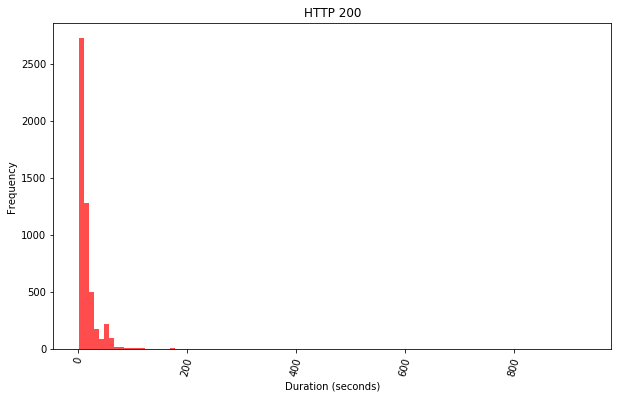

In [16]:
# Duration distribution by http response
fig, ax1 = plt.subplots(figsize=(10, 6))

# http code
code = 200

df_to_plot = df_qos[(df_qos['code']==code)]['duration']
#df_qos[(df_qos['code']==500)]['duration'].hist(bins=100)

df_to_plot.plot(kind='hist',bins=100, ax=ax1, color={'r','g'}, alpha=0.7)
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Duration (seconds)')
ax1.set_title('HTTP ' + str(code))
plt.sca(ax1)# matplotlib only acts over the current axis
plt.xticks(rotation=75)

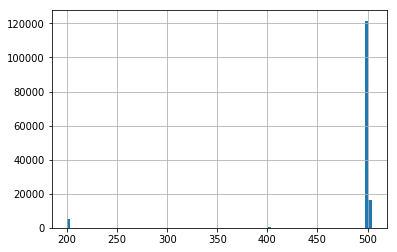

In [17]:
df_qos['code'].hist(bins=100)

In [18]:
df_qos['code'].unique()

array([200, 500, 503, 504, 401, 400, 403, 429])

In [19]:
df_qos.code.value_counts()

500    121573
504     16114
200      5200
503       239
403       158
400        71
429        48
401        28
Name: code, dtype: int64

In [20]:
df_qos.describe()

,code,duration,runid
count,143431.000000,143431.000000,143431.000000
mean,489.378635,8.010440,3.193912
std,56.310118,37.302180,2.130233
min,200.000000,0.510992,0.000000
25%,500.000000,1.229658,1.000000
50%,500.000000,1.386000,3.000000
75%,500.000000,1.686961,5.000000
max,504.000000,11776.346960,7.000000


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

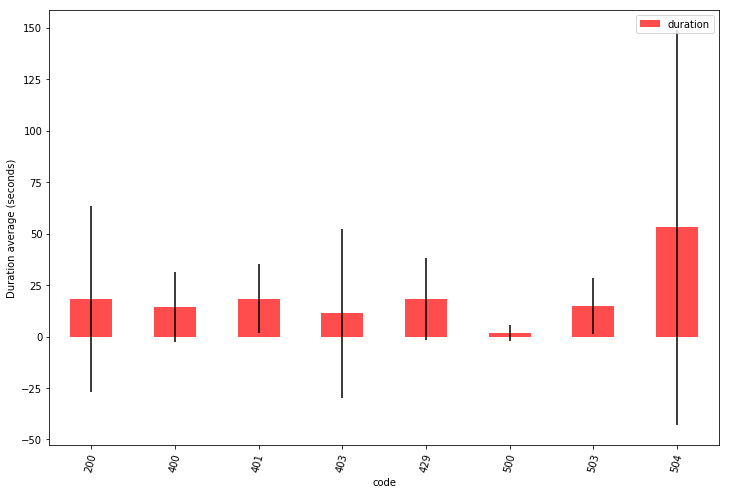

In [21]:
# Average duration by error code
df = pd.DataFrame({
    'code': df_qos['code'],
    'duration': df_qos['duration'],
})

df = df.sort_values(by='code')

fig, ax1 = plt.subplots(figsize=(12, 8))

to_drop = []

df = df[~df['code'].isin(to_drop)]

means = df.groupby('code').mean()
std = df.groupby('code').std()

means.plot(kind='bar',yerr=std, ax=ax1, color={'r','g'}, alpha=0.7)
ax1.set_ylabel('Duration average (seconds)')
plt.sca(ax1)# matplotlib only acts over the current axis
plt.xticks(rotation=75)


In [22]:
df.groupby('code').describe()

duration                                                        \
         count       mean        std       min        25%        50%   
code                                                                   
200     5200.0  18.369708  45.152366  1.093434   5.101668   9.616895   
400       71.0  14.519272  17.004086  1.521450   2.382295   6.040169   
401       28.0  18.354057  16.694566  3.972337   7.201113  10.523281   
403      158.0  11.307277  41.118286  0.510992   1.984274   3.097917   
429       48.0  18.251790  20.144784  1.925331   4.438612   7.041842   
500   121573.0   1.574376   3.834804  0.746104   1.204842   1.336158   
503      239.0  14.992382  13.607850  1.579220   4.407427   8.935913   
504    16114.0  53.011713  96.027167  2.939227  61.316617  61.514222   

                               
            75%           max  
code                           
200   18.497036    932.487138  
400   14.806518     57.849975  
401   28.074714     59.586827  
403    5.634794    350.353190  
429   27.896545     65.337632  
500    1.496753    714.980385  
503   22.052120     51.800226  
504   61.687587  11776.346960

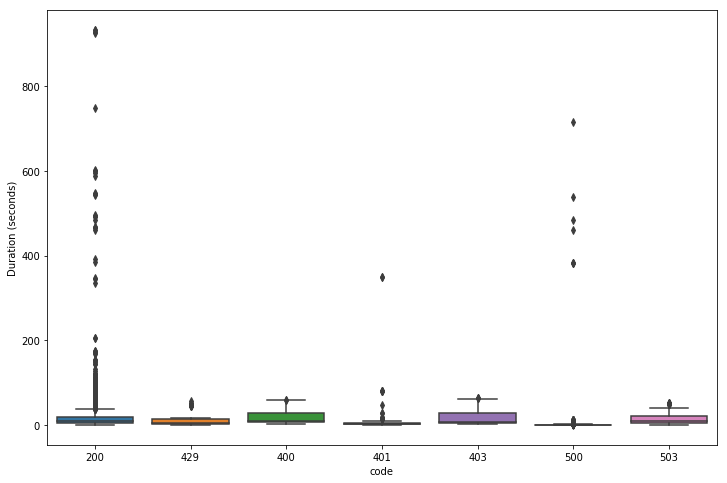

In [23]:
# Duration by error code
df = pd.DataFrame({
    'code': df_qos['code'],
    'duration': df_qos['duration'],
})

to_drop = [504]

df = df[~df['code'].isin(to_drop)]

fig, ax1 = plt.subplots(figsize=(12, 8))

ax = sns.boxplot(x="code", y="duration", data=df, ax=ax1)
ax1.set_ylabel('Duration (seconds)')
ax1.set_xticklabels(set(df.code))
plt.sca(ax1)# matplotlib

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

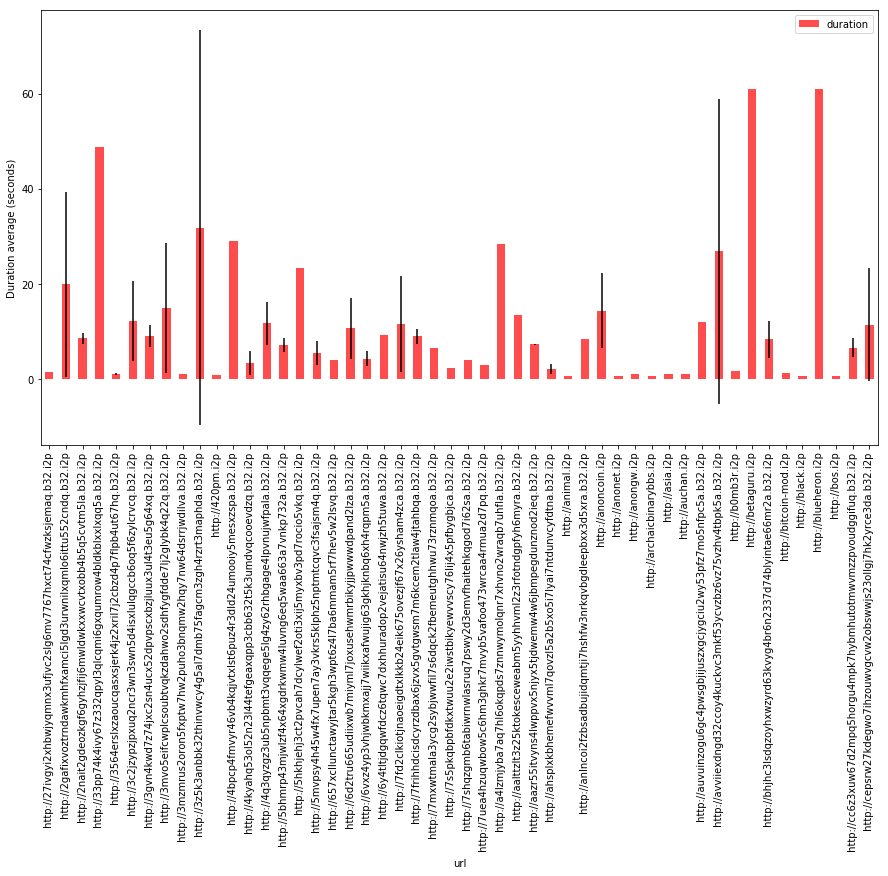

In [12]:
# Average duration by eepsite
df = pd.DataFrame({
    'url': df_qos['url'],
    'duration': df_qos['duration'],
})

fig, ax1 = plt.subplots(figsize=(15, 8),)

df = df.sort_values(by='url')

means = df.groupby('url').mean()
std = df.groupby('url').std()

means = means[0:50]
std = std[0:50]

means.plot(kind='bar',yerr=std, ax=ax1, color={'r'}, alpha=0.7)
ax1.set_ylabel('Duration average (seconds)')
plt.sca(ax1)# matplotlib only acts over the current axis
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

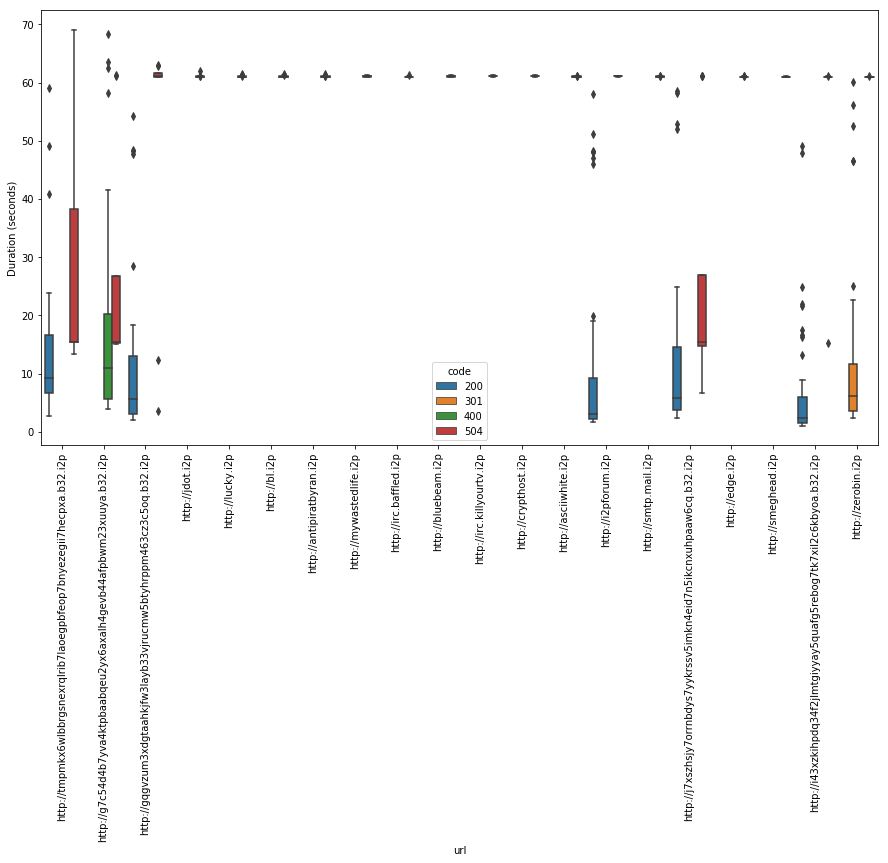

In [13]:
# Average duration by eepsite
df = pd.DataFrame({
    'url': df_qos['url'],
    'duration': df_qos['duration'],
    'code': df_qos['code']
})

fig, ax1 = plt.subplots(figsize=(15, 8),)

df = df.sort_values(by='duration',ascending=False)

eepsites = list(df[0:10000].groupby('url').groups.keys())[0:20]
df = df[df['url'].isin(eepsites)]

ax = sns.boxplot(x="url", y="duration", data=df, hue='code', ax=ax1)
ax1.set_ylabel('Duration (seconds)')
#ax1.set_ylim((0,3))
plt.sca(ax1)# matplotlib only acts over the current axis
plt.xticks(rotation=90)

# Availability study

In [14]:
HTTP_RESPONSE_CODES = {200:'OK', 
                       301:'Moved Permanently', 
                       302:'Found (Previously "Moved temporarily")', 
                       400:'Bad Request', 
                       401:'Unauthorized',
                       403:'Forbidden',
                       429:'Too Many Requests',
                       500:'Internal Server Error',
                       502:'Bad Gateway',
                       503:'Service Unavailable',
                       504:'Gateway Timeout'}

In [15]:
df_qos

,url,protocol,code,start,end,duration,runid
0,http://tracker.crypthost.i2p,HTTP/1.1,400,1.541837e+09,1.541837e+09,1.063409,0.0
1,http://tracker.thebland.i2p,HTTP/1.1,400,1.541837e+09,1.541837e+09,1.972787,0.0
2,http://syndie-project.i2p,HTTP/1.1,200,1.541837e+09,1.541837e+09,1.526463,0.0
3,http://trac.i2p2.i2p,HTTP/1.1,200,1.541837e+09,1.541837e+09,1.582271,0.0
4,http://thematrix.i2p,HTTP/1.1,500,1.541837e+09,1.541837e+09,0.906165,0.0
5,http://tracker2.postman.i2p,HTTP/1.1,302,1.541837e+09,1.541837e+09,1.614859,0.0
6,http://planet.i2p,HTTP/1.1,200,1.541837e+09,1.541837e+09,2.006423,0.0
7,http://bbs.tokachi.i2p,HTTP/1.1,500,1.541837e+09,1.541837e+09,0.843150,0.0
8,http://31337.i2p,HTTP/1.1,500,1.541837e+09,1.541837e+09,0.795479,0.0
9,http://miraiex.i2p,HTTP/1.1,500,1.541837e+09,1.541837e+09,0.683265,0.0
